In [306]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [307]:
df_final = pd.read_csv('C://Users//asus//Desktop//切割C.csv',engine='python')

In [308]:
tst_data = pd.read_csv('C://Users//asus//Desktop//C(MLCC)_測試.csv', engine = 'python')

In [309]:
df_final

,Unnamed: 0,Unnamed: 1,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,...,- TURNOVER BY VALUE,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE
0,1,27.25,27216.30,1.21,40.4,248.8,3.4001,0.51,1.04,0.4558,...,127918.0,3023.4,12.40,12.40,12.45,12.40,12.55,12.30,10280.0,NaN
1,2,27.58,27545.52,1.19,40.9,251.8,3.4001,0.51,1.04,0.4560,...,204546.0,4754.5,12.55,12.55,12.60,12.55,12.80,12.50,16166.0,NaN
2,3,NaN,27545.52,1.19,40.9,251.8,3.4001,0.51,1.04,0.4561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,27.47,27435.78,1.20,40.7,250.8,3.4001,0.51,1.04,0.4562,...,131070.0,3058.1,12.80,12.50,12.50,12.45,12.80,12.45,10398.0,NaN
4,5,27.25,27216.30,1.21,40.4,248.8,3.4001,0.51,1.04,0.4562,...,276317.0,6535.0,12.55,12.40,12.45,12.40,12.60,12.30,22220.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,1743,53.06,29635.93,4.35,9.9,404.6,1.1944,2.98,6.93,0.2865,...,33176.0,480.9,58.70,57.40,57.60,57.40,58.70,57.30,574.4,68.99
1743,1744,53.16,29687.56,4.35,9.9,405.3,1.1944,2.98,6.93,0.2865,...,58570.0,852.7,58.30,57.50,57.70,57.50,58.40,57.10,1018.5,68.69
1744,1745,53.25,29739.19,4.34,9.9,406.0,1.1944,2.98,6.93,0.2863,...,92540.0,1349.1,57.20,57.60,57.60,57.50,57.80,57.10,1611.4,68.59
1745,1746,53.71,29997.35,4.30,10.0,409.5,1.1944,2.98,6.93,0.2859,...,86407.0,1245.2,58.10,58.10,58.10,58.00,58.50,57.60,1487.3,69.39


In [310]:
tst_data

,Unnamed: 0,Unnamed: 1,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- 12M FWD DIVIDEND YIELD (%),- 12 MONTH FORWARD EARN. YIELD,- CURRENT EV / 12M FWD EBIT,- CURRENT EV / 12M FWD EBITDA,...,CORP - NET INC BEFORE EXTRA/PFD DIVS,CORP - PREFERRED DIVIDEND REQUIREMENT,CORP - DIVIDENDS PROVIDED/PAID-COMMON,CORP - EARNINGS BEF INTEREST & TAXES,CORP - EBIT & DEPRECIATION,CORP - NET INCOME - BASIC,#ERROR.13,CORP - EMPLOYEES,CORP - FY1 EPS MEAN EST,CORP - FY2 EPS MEAN EST
0,1748.0,53.80,30048.97,4.29,10.0,410.2,8.755,12.035,7.063,4.665,...,3954115.0,0.0,1500626.0,5173079.0,7162151.0,3954115.0,NaN,NaN,8.21,8.60
1,1749.0,53.52,29894.08,4.32,10.0,408.1,8.755,12.035,7.027,4.641,...,3954115.0,0.0,1500626.0,5173079.0,7162151.0,3954115.0,NaN,NaN,8.21,8.60
2,1750.0,52.88,29532.67,4.37,9.9,403.2,8.755,12.035,6.944,4.586,...,3954115.0,0.0,1500626.0,5173079.0,7162151.0,3954115.0,NaN,NaN,8.21,8.60
3,1751.0,53.43,29842.45,4.32,10.0,407.4,9.066,12.493,7.032,4.633,...,3954115.0,0.0,1500626.0,5173079.0,7162151.0,3954115.0,NaN,NaN,8.13,8.64
4,1752.0,53.80,30048.97,4.29,10.0,410.2,9.066,12.493,7.080,4.664,...,3954115.0,0.0,1500626.0,5173079.0,7162151.0,3954115.0,NaN,NaN,8.13,8.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
df_final.columns

Index(['Unnamed: 0', 'Unnamed: 1', ' - MARKET VALUE', ' - DIVIDEND YIELD',
       ' - PER', ' - PRICE INDEX', ' - ADJUSTMENTFACTOR', ' - DIV.PER SHR.',
       ' - EARNINGS PER SHR', ' - HISTORICAL VOLATILITY 5 YEARS',
       ' - MARKET VAL BY CO.', ' - ASK PRICE', ' - BID PRICE', ' - PRICE HIGH',
       ' - PRICE LOW', ' - OPENING PRICE', ' - RETURN IND AS PAID',
       ' - TOT RETURN IND', ' - TURNOVER BY VALUE', ' - TURNOVER BY VOLUME',
       ' - UNADJ. PRICE OPEN', ' - UNADJUSTED PRICE', ' - UNADJ. ASK PRICE',
       ' - UNADJ. BID PRICE', ' - UNADJ. PRICE HIGH', ' - UNADJ. PRICE LOW',
       ' - UNADJ. VOLUME', ' - VOL WGHTD AV PRICE'],
      dtype='object')

In [312]:
tst_data.columns

Index(['Unnamed: 0', 'Unnamed: 1', ' - MARKET VALUE', ' - DIVIDEND YIELD',
       ' - PER', ' - PRICE INDEX', ' - 12M FWD DIVIDEND YIELD (%)',
       ' - 12 MONTH FORWARD EARN. YIELD', ' - CURRENT EV / 12M FWD EBIT',
       ' - CURRENT EV / 12M FWD EBITDA',
       ...
       ' CORP - NET INC BEFORE EXTRA/PFD DIVS',
       ' CORP - PREFERRED DIVIDEND REQUIREMENT',
       ' CORP - DIVIDENDS PROVIDED/PAID-COMMON',
       ' CORP - EARNINGS BEF INTEREST & TAXES', ' CORP - EBIT & DEPRECIATION',
       ' CORP - NET INCOME - BASIC', '#ERROR.13', ' CORP - EMPLOYEES',
       ' CORP - FY1 EPS MEAN EST', ' CORP - FY2 EPS MEAN EST'],
      dtype='object', length=122)

In [313]:
name = ['Unnamed: 0', 'Unnamed: 1', ' - MARKET VALUE', ' - DIVIDEND YIELD',
       ' - PER', ' - PRICE INDEX', ' - ADJUSTMENTFACTOR', ' - DIV.PER SHR.',
       ' - EARNINGS PER SHR', ' - HISTORICAL VOLATILITY 5 YEARS',
       ' - MARKET VAL BY CO.', ' - ASK PRICE', ' - BID PRICE', ' - PRICE HIGH',
       ' - PRICE LOW', ' - OPENING PRICE', ' - RETURN IND AS PAID',
       ' - TOT RETURN IND', ' - TURNOVER BY VALUE', ' - TURNOVER BY VOLUME',
       ' - UNADJ. PRICE OPEN', ' - UNADJUSTED PRICE', ' - UNADJ. ASK PRICE',
       ' - UNADJ. BID PRICE', ' - UNADJ. PRICE HIGH', ' - UNADJ. PRICE LOW',
       ' - UNADJ. VOLUME', ' - VOL WGHTD AV PRICE']

In [314]:
#留下共同欄位
tst_data = tst_data[name]

In [315]:
#刪掉第一列&重新命名unnamed 1為stock price
df_final = df_final.drop(columns = ['Unnamed: 0'])
df_final.rename(columns={'Unnamed: 1':'stock price'}, inplace = True)

In [316]:
tst_data = tst_data.drop(columns = ['Unnamed: 0'])
tst_data.rename(columns={'Unnamed: 1':'stock price'}, inplace = True)

In [317]:
#刪掉放假的列
df_final = df_final.dropna(axis = 0, how = 'any', subset=['stock price'])

tst_data = tst_data.dropna(axis = 0, how = 'any', subset=['stock price'])

In [318]:
#補空值
df_final=df_final.fillna(method='ffill')
df_final.fillna(method='bfill',inplace=True)

In [319]:
tst_data=tst_data.fillna(method='ffill')
tst_data.fillna(method='bfill',inplace=True)

In [320]:
df_final=df_final.fillna(method='bfill')

tst_data=tst_data.fillna(method='bfill')

In [321]:
classi = []
for row in range(len(tst_data)):
    try:
        if ((tst_data.iloc[row+1,0]-tst_data.iloc[row,0])/tst_data.iloc[row,0]) > 0:
            classi.append(1)
        elif((tst_data.iloc[row+1,0]-tst_data.iloc[row,0])/tst_data.iloc[row,0]) == 0:
            classi.append(0)
        else:
            classi.append(-1)
    except:
        classi.append(99)
tst_data['三元'] = classi
tst_data.三元.value_counts()

 1     237
-1     191
 0      24
 99      1
Name: 三元, dtype: int64

In [322]:
df_final.shape

(1649, 27)

In [323]:
tst_data.shape

(453, 28)

In [324]:
df_final

,stock price,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,...,- TURNOVER BY VALUE,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE
0,27.25,27216.30,1.21,40.4,248.8,3.4001,0.51,1.04,0.4558,27216.30,...,127918.0,3023.4,12.40,12.40,12.45,12.40,12.55,12.30,10280.0,52.30
1,27.58,27545.52,1.19,40.9,251.8,3.4001,0.51,1.04,0.4560,27545.52,...,204546.0,4754.5,12.55,12.55,12.60,12.55,12.80,12.50,16166.0,52.30
3,27.47,27435.78,1.20,40.7,250.8,3.4001,0.51,1.04,0.4562,27435.78,...,131070.0,3058.1,12.80,12.50,12.50,12.45,12.80,12.45,10398.0,52.30
4,27.25,27216.30,1.21,40.4,248.8,3.4001,0.51,1.04,0.4562,27216.30,...,276317.0,6535.0,12.55,12.40,12.45,12.40,12.60,12.30,22220.0,52.30
5,27.25,27216.30,1.21,40.4,248.8,3.4001,0.51,1.04,0.4562,27216.30,...,279870.0,6578.3,12.40,12.40,12.40,12.35,12.75,12.30,22367.0,52.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,53.06,29635.93,4.35,9.9,404.6,1.1944,2.98,6.93,0.2865,29635.93,...,33176.0,480.9,58.70,57.40,57.60,57.40,58.70,57.30,574.4,68.99
1743,53.16,29687.56,4.35,9.9,405.3,1.1944,2.98,6.93,0.2865,29687.56,...,58570.0,852.7,58.30,57.50,57.70,57.50,58.40,57.10,1018.5,68.69
1744,53.25,29739.19,4.34,9.9,406.0,1.1944,2.98,6.93,0.2863,29739.19,...,92540.0,1349.1,57.20,57.60,57.60,57.50,57.80,57.10,1611.4,68.59
1745,53.71,29997.35,4.30,10.0,409.5,1.1944,2.98,6.93,0.2859,29997.35,...,86407.0,1245.2,58.10,58.10,58.10,58.00,58.50,57.60,1487.3,69.39


In [325]:
tst_data

,stock price,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,...,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE,三元
0,53.80,30048.97,4.29,10.0,410.2,1.1944,2.98,6.93,0.2856,30048.97,...,462.6,57.8,58.2,58.2,58.1,58.2,57.7,552.5,69.33,-1
1,53.52,29894.08,4.32,10.0,408.1,1.1944,2.98,6.93,0.2852,29894.08,...,313.8,58.2,57.9,58.0,57.9,58.4,57.8,374.9,69.30,-1
2,52.88,29532.67,4.37,9.9,403.2,1.1944,2.98,6.93,0.2848,29532.67,...,1032.6,57.9,57.2,57.5,57.2,58.2,57.1,1233.4,68.67,1
3,53.43,29842.45,4.32,10.0,407.4,1.1944,2.98,6.93,0.2844,29842.45,...,414.3,57.4,57.8,58.0,57.8,58.1,57.2,494.9,68.96,1
4,53.80,30048.97,4.29,10.0,410.2,1.1944,2.98,6.93,0.2839,30048.97,...,648.0,58.1,58.2,58.2,58.0,58.4,57.7,774.0,69.42,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,338.75,175086.10,3.03,9.2,2419.5,1.0000,12.41,44.42,0.4866,175086.10,...,21252.9,415.0,410.0,410.5,410.0,428.5,409.0,21252.9,418.13,1
481,346.19,178929.40,2.96,9.4,2472.6,1.0000,12.41,44.42,0.4874,178929.40,...,18985.0,412.0,419.0,419.0,418.5,427.0,410.5,18985.0,419.75,-1
482,345.36,178502.40,2.97,9.4,2466.7,1.0000,12.41,44.42,0.4881,178502.40,...,24461.6,445.0,418.0,418.5,418.0,448.5,417.5,24461.6,433.61,1
483,348.25,179997.10,2.94,9.5,2487.3,1.0000,12.41,44.42,0.4885,179997.10,...,17035.1,425.0,421.5,422.0,421.5,429.0,419.0,17035.1,423.46,-1


In [326]:
classi = []
for row in range(len(df_final)):
    try:
        if ((df_final.iloc[row+1,0]-df_final.iloc[row,0])/df_final.iloc[row,0]) > 0:
            classi.append(1)
        elif((df_final.iloc[row+1,0]-df_final.iloc[row,0])/df_final.iloc[row,0]) == 0:
            classi.append(0)
        else:
            classi.append(-1)
    except:
        classi.append(99)

In [327]:
classi[-1]

99

In [328]:
df_final['三元'] = classi

In [329]:
df_final.三元.value_counts()

-1     725
 1     715
 0     208
 99      1
Name: 三元, dtype: int64

# 測試集

In [201]:
test = tst_data
# Target column
target_adj_close = pd.DataFrame(test['stock price'])
display(test.head())

,stock price,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,...,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE,三元
0,53.80,30048.97,4.29,10.0,410.2,1.1944,2.98,6.93,0.2856,30048.97,...,462.6,57.8,58.2,58.2,58.1,58.2,57.7,552.5,69.33,-1
1,53.52,29894.08,4.32,10.0,408.1,1.1944,2.98,6.93,0.2852,29894.08,...,313.8,58.2,57.9,58.0,57.9,58.4,57.8,374.9,69.30,-1
2,52.88,29532.67,4.37,9.9,403.2,1.1944,2.98,6.93,0.2848,29532.67,...,1032.6,57.9,57.2,57.5,57.2,58.2,57.1,1233.4,68.67,1
3,53.43,29842.45,4.32,10.0,407.4,1.1944,2.98,6.93,0.2844,29842.45,...,414.3,57.4,57.8,58.0,57.8,58.1,57.2,494.9,68.96,1
4,53.80,30048.97,4.29,10.0,410.2,1.1944,2.98,6.93,0.2839,30048.97,...,648.0,58.1,58.2,58.2,58.0,58.4,57.7,774.0,69.42,-1


In [202]:
# selecting Feature Columns
feature_columns = list(tst_data.columns)

In [203]:
feature_columns= feature_columns[1:]

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,- ASK PRICE,...,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE,三元
0,0.002244,0.920904,0.027083,0.002201,1.0,0.0,0.0,0.017383,0.002244,0.002087,...,0.008313,0.000326,0.001534,0.001449,0.001455,0.000479,0.001137,0.009940,0.001647,0.00
1,0.001870,0.929379,0.027083,0.001837,1.0,0.0,0.0,0.015451,0.001870,0.001841,...,0.003941,0.000652,0.001278,0.001278,0.001284,0.000639,0.001224,0.004715,0.001616,0.00
2,0.000997,0.943503,0.025000,0.000988,1.0,0.0,0.0,0.013520,0.000997,0.001228,...,0.025063,0.000407,0.000682,0.000852,0.000685,0.000479,0.000612,0.029969,0.000968,0.02
3,0.001745,0.929379,0.027083,0.001716,1.0,0.0,0.0,0.011589,0.001745,0.001841,...,0.006894,0.000000,0.001193,0.001278,0.001198,0.000399,0.000700,0.008245,0.001266,0.02
4,0.002244,0.920904,0.027083,0.002201,1.0,0.0,0.0,0.009174,0.002244,0.002087,...,0.013761,0.000570,0.001534,0.001449,0.001369,0.000639,0.001137,0.016455,0.001740,0.00


In [205]:
#報酬率
retur = list(tst_data.iloc[:,0].values)

re = []
for i in range(len(retur)):
    try:
        re.append((retur[i+1]-retur[i])/retur[i])
    except:
        continue

mm = np.mean(re)
std = np.std(re, ddof=1)
print(mm)
print(std)

0.004788230257283505
0.040072934688346835


In [206]:
#模型轉換形式

#X_train =np.array(X_train)
X_test =np.array(feature_minmax_transform.values)

#X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [207]:
y_test

array([ 53.8 ,  53.52,  52.88,  53.43,  53.8 ,  53.52,  53.62,  53.25,
        53.43,  52.14,  53.52,  53.06,  53.62,  53.43,  54.17,  54.63,
        54.82,  55.56,  56.39,  56.85,  57.32,  59.07,  61.2 ,  59.9 ,
        58.61,  58.79,  59.44,  60.92,  64.71,  64.71,  70.26,  69.79,
        69.15,  66.84,  66.19,  66.74,  65.63,  66.19,  65.27,  64.71,
        64.62,  64.8 ,  64.06,  64.71,  67.11,  67.67,  67.58,  69.89,
        73.95,  69.61,  68.87,  75.71,  74.23,  73.86,  74.6 ,  74.51,
        78.48,  77.93,  77.65,  77.65,  79.04,  78.3 ,  78.58,  77.47,
        76.54,  75.8 ,  76.17,  77.56,  77.28,  77.28,  76.45,  77.65,
        77.47,  76.91,  78.3 ,  78.02,  78.67,  86.06,  82.  ,  82.27,
        83.01,  83.01,  85.97,  89.49,  93.37,  97.99,  94.75,  97.99,
        98.45,  97.53,  97.07,  98.91,  97.53,  93.83,  92.44,  93.37,
        92.44,  92.44,  93.37,  91.06,  90.87,  92.44,  90.69,  91.61,
        93.37,  96.6 ,  97.07,  94.75,  94.29,  92.17,  95.22,  96.6 ,
      

In [208]:
y_test = tst_data.iloc[:,0].values
y_pred_test_lstm = model_lstm.predict(X_tst_t)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Test set is:	-1.084


## 做出Validation

In [23]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,- ASK PRICE,...,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE,三元
1,0.316492,0.127957,0.786813,0.239753,1.0,0.085427,0.0,0.986087,0.316492,0.241230,...,0.112981,0.085326,0.085336,0.086004,0.085757,0.085174,0.086554,0.113441,0.372557,0.0
3,0.313843,0.129032,0.782418,0.237463,1.0,0.085427,0.0,0.987246,0.313843,0.236643,...,0.072384,0.089420,0.084519,0.084369,0.084114,0.085174,0.085728,0.072865,0.372557,0.0
4,0.308546,0.130108,0.775824,0.232883,1.0,0.085427,0.0,0.987246,0.308546,0.234350,...,0.155591,0.085326,0.082884,0.083551,0.083292,0.082019,0.083251,0.156029,0.372557,0.5
5,0.308546,0.130108,0.775824,0.232883,1.0,0.085427,0.0,0.987246,0.308546,0.232056,...,0.156627,0.082869,0.082884,0.082734,0.082471,0.084385,0.083251,0.157063,0.372557,1.0
6,0.313843,0.129032,0.782418,0.237463,1.0,0.085427,0.0,0.987246,0.313843,0.238937,...,0.102810,0.084507,0.084519,0.085186,0.084935,0.082808,0.084903,0.103276,0.372557,1.0


Shape of features :  (1647, 27)
Shape of target :  (1647, 1)


,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,- ASK PRICE,...,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE,三元
1740,0.391876,0.452688,0.112088,0.621937,0.0,0.499162,0.57129,0.004058,0.391876,0.622099,...,0.002620,0.855879,0.851234,0.852845,0.855430,0.824921,0.857945,0.000919,0.627306,0.0
1741,0.383152,0.458065,0.109890,0.610488,0.0,0.499162,0.57129,0.004058,0.383152,0.610766,...,0.007653,0.855879,0.839791,0.841400,0.843930,0.823344,0.838124,0.002687,0.615963,0.0
1742,0.366951,0.467742,0.105495,0.589650,0.0,0.499162,0.57129,0.003478,0.366951,0.591473,...,0.010709,0.841140,0.818538,0.821779,0.822573,0.809148,0.826561,0.003760,0.600656,1.0
1743,0.368197,0.467742,0.105495,0.591253,0.0,0.499162,0.57129,0.003478,0.368197,0.593092,...,0.019607,0.834589,0.820173,0.823414,0.824216,0.804416,0.823257,0.006884,0.596556,1.0
1744,0.369443,0.466667,0.105495,0.592856,0.0,0.499162,0.57129,0.002319,0.369443,0.591473,...,0.031486,0.816574,0.821808,0.821779,0.824216,0.794953,0.823257,0.011055,0.595189,1.0


,stock price
1740,54.26
1741,53.06
1742,53.16
1743,53.25
1744,53.71



 -----After process------ 

Shape of features :  (1557, 27)
Shape of target :  (1557, 1)


,stock price
1646,60.42
1647,59.64
1648,60.09
1649,60.09
1650,60.53


In [24]:
ts_split= TimeSeriesSplit(n_splits=12)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [25]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  2.4147344981652163
R2 score:  0.26578629509610496


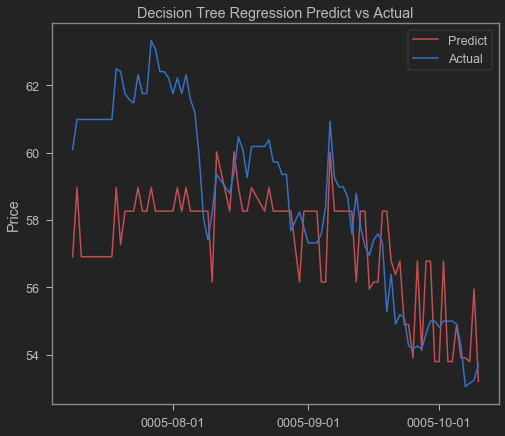

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
benchmark_dt=dt.fit(X_train, y_train)
validate_result(benchmark_dt, 'Decision Tree Regression')

In [28]:
retur = list(df_final.iloc[:,0].values)

re = []
for i in range(len(retur)):
    try:
        re.append((retur[i+1]-retur[i])/retur[i])
    except:
        continue

mm = np.mean(re)
std = np.std(re, ddof=1)
print(mm)
print(std)

In [31]:
sum(list(df_final.iloc[:,0].values))/len(list(df_final.iloc[:,0].values))

36.191778992106826

In [32]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [33]:
X_tr_t.shape

(1438, 1, 27)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/50
1438/1438 [==============================] - 1s 1ms/step - loss: 932.4327
Epoch 2/50
1438/1438 [==============================] - 1s 421us/step - loss: 322.3321
Epoch 3/50
1438/1438 [==============================] - 1s 420us/step - loss: 41.5700
Epoch 4/50
1438/1438 [==============================] - 1s 508us/step - loss: 11.0482
Epoch 5/50
1438/1438 [==============================] - 1s 483us/step - loss: 9.4277
Epoch 6/50
1438/1438 [==============================] - 1s 506us/step - loss: 8.6750
Epoch 7/50
1438/1438 [==============================] - 1s 497us/step - loss: 8.1592
Epoch 8/50
1438/1438 [==============================] - 1s 488us/step - loss: 7.7269
Epoch 9/50
1438/1438 [==============================] - 1s 492us/step - loss: 7.3117
Epoch 10/50
1438/1438 [==============================] - 1s 506us/step - loss: 6.9012
Epoch 11/50
1438/1438 [==============================] - 1s 570us/step - loss: 6.5024
Epoch 12/50
1438/1438 [==============================] - 1s

In [35]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


The R2 score on the Train set is:	0.991
The R2 score on the Test set is:	-2.041


# #PLOT

453/453 [==============================] - 1s 1ms/step
LSTM: 102354.368774


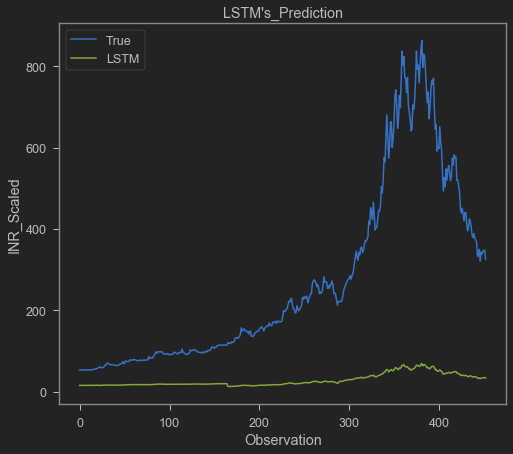

In [218]:
score_lstm = model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

print('LSTM: %f'%score_lstm)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


In [219]:
y_pred_test_LSTM

table_pred = []
for i in range(len(y_pred_test_lstm)):
    try:
        if (y_pred_test_lstm[i+1]-y_pred_test_lstm[i])/y_pred_test_lstm[i] > mm+std:
            table_pred.append(1)
        elif (y_pred_test_lstm[i+1]-y_pred_test_lstm[i])/y_pred_test_lstm[i] < mm-std:
            table_pred.append(-1)
        else:
            table_pred.append(0)
    except:
        break

In [304]:
print(table_pred)
print(len(table_pred))

[-1, -1, -1, 1, 0, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 0, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 0, 1, -1, -1, 1, 0, 1, -1, 1, 1, -1, -1, 1, 0, 99]
50


In [221]:
table_test = []
for i in range(len(y_test)):
    try:
        if (y_test[i+1]-y_test[i])/y_test[i] > mm+std:
            table_test.append(1)
        elif (y_test[i+1]-y_test[i])/y_test[i] < mm-std:
            table_test.append(-1)
        else:
            table_test.append(0)
    except:
        break


In [214]:
y_predict_table = []
for i in range(len(y_pred_test_LSTM)):
    try:
        if (y_pred_test_LSTM[i+1]-y_test[i]) > mm+std:
            y_predict_table.append(1)
        elif (y_pred_test_LSTM[i+1]-y_test[i]) < mm-std:
            y_predict_table.append(-1)
        else:
            y_predict_table.append(0)
    except:
        break

In [305]:
print(len(table_pred))

50


In [223]:
table_test[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### 第一次想法 (預測和真實分開)

In [226]:
import sklearn
matrix = sklearn.metrics.confusion_matrix(table_test,table_pred)

print("漲的準確率:"+str(matrix[0][0]/sum(matrix[0])))
print("平盤準確率:"+str(matrix[1][1]/sum(matrix[1])))
print("跌的準確率:"+str(matrix[2][2]/sum(matrix[2])))
print("整體準確率:"+str((matrix[0][0]+matrix[1][1]+matrix[2][2])/sum(sum(matrix))))

漲的準確率:0.5166666666666667
平盤準確率:0.981651376146789
跌的準確率:0.36923076923076925
整體準確率:0.831858407079646


In [225]:
matrix

array([[ 31,  29,   0],
       [  5, 321,   1],
       [  1,  40,  24]], dtype=int64)

In [240]:
# 預測報酬率
y_C_pred_return = []
for i in range(len(y_pred_test_lstm)):
    try:
        y_C_pred_return.append(((y_pred_test_lstm[i+1]-y_pred_test_lstm[i])/y_pred_test_lstm[i])[0])
    except:
        y_C_pred_return.append(99)
y_C_pred_three = table_pred + [99]
y_C_pred = [ i[0] for i in y_pred_test_LSTM]
pd.DataFrame({'三元':y_C_pred_three,'預測值':y_C_pred,'報酬率':y_C_pred_return}).to_csv('abc[測試集]C.csv')\

print(len(y_C_pred_three))
print(len(y_C_pred))
print(len(y_C_pred_return))

453
453
453


# 50days

In [293]:
C_test_1_data = pd.read_excel(r'C:\Users\asus\Desktop\C(MLCC)_50天_ques.xlsx')

In [294]:
name= [ ' - MARKET VALUE', ' - DIVIDEND YIELD', ' - PER',
       ' - PRICE INDEX', ' - ADJUSTMENTFACTOR', ' - DIV.PER SHR.',
       ' - EARNINGS PER SHR', ' - HISTORICAL VOLATILITY 5 YEARS',
       ' - MARKET VAL BY CO.', ' - ASK PRICE', ' - BID PRICE', ' - PRICE HIGH',
       ' - PRICE LOW', ' - OPENING PRICE', ' - RETURN IND AS PAID',
       ' - TOT RETURN IND', ' - TURNOVER BY VALUE', ' - TURNOVER BY VOLUME',
       ' - UNADJ. PRICE OPEN', ' - UNADJUSTED PRICE', ' - UNADJ. ASK PRICE',
       ' - UNADJ. BID PRICE', ' - UNADJ. PRICE HIGH', ' - UNADJ. PRICE LOW',
       ' - UNADJ. VOLUME', ' - VOL WGHTD AV PRICE']
C_test_1_data = C_test_1_data[name]
feature_columns = list(C_test_1_data.columns)

In [295]:
C_test_1_data=C_test_1_data.fillna(method='ffill')
C_test_1_data.fillna(method='bfill',inplace=True)

In [296]:
classi = []
for row in range(len(C_test_1_data)):
    try:
        if ((C_test_1_data.iloc[row+1,13]-C_test_1_data.iloc[row,13])/C_test_1_data.iloc[row,13]) > 0:
            classi.append(1)
        elif((C_test_1_data.iloc[row+1,13]-C_test_1_data.iloc[row,13])/C_test_1_data.iloc[row,13]) == 0:
            classi.append(0)
        else:
            classi.append(-1)
    except:
        classi.append(99)
C_test_1_data['三元'] = classi
C_test_1_data.三元.value_counts()

-1     27
 1     21
 99     1
 0      1
Name: 三元, dtype: int64

In [297]:
test = C_test_1_data
# Target column
#target_adj_close = pd.DataFrame(test['股價'])

test

,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,- ASK PRICE,...,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE,三元
0,166545.3,3.18,8.8,2301.4,1,12.41,44.42,0.4897,166545.3,390.0,...,19242.4,380.0,390.0,390.0,389.5,394.5,375.0,19242.4,385.17,1
1,156296.4,3.39,8.2,2159.8,1,12.41,44.42,0.4911,156296.4,366.5,...,23400.5,388.0,366.0,366.5,366.0,393.5,366.0,23400.5,379.75,-1
2,149036.7,3.55,7.9,2059.5,1,12.41,44.42,0.4928,149036.7,349.5,...,28920.2,368.0,349.0,349.5,349.0,373.0,349.0,28920.2,361.12,-1
3,134730.9,3.93,7.1,1861.8,1,12.41,44.42,0.4952,134730.9,316.0,...,24997.9,328.0,315.5,316.0,315.5,330.5,315.5,24997.9,322.54,1
4,138360.8,3.83,7.3,1912.0,1,12.41,44.42,0.4970,138360.8,324.5,...,32901.2,332.0,324.0,324.5,324.0,332.0,313.5,32901.2,322.06,-1
5,136652.6,3.88,7.2,1888.4,1,12.41,44.42,0.4986,136652.6,320.5,...,27865.0,324.0,320.0,320.5,320.0,332.0,315.0,27865.0,322.61,-1
6,127257.7,4.16,6.7,1758.5,1,12.41,44.42,0.5006,127257.7,298.5,...,28962.9,316.0,298.0,298.5,298.0,316.5,298.0,28962.9,306.52,-1
7,134730.9,3.93,7.1,1861.8,1,12.41,44.42,0.5023,134730.9,316.0,...,33335.7,305.0,315.5,316.0,315.5,325.5,305.0,33335.7,315.44,1
8,148182.6,3.58,7.8,2047.7,1,12.41,44.42,0.5032,148182.6,316.0,...,33765.7,320.0,347.0,316.0,347.0,347.0,319.0,33765.7,336.80,1
9,147542.1,3.59,7.8,2038.8,1,12.41,44.42,0.5040,147542.1,346.0,...,47974.8,365.5,345.5,346.0,345.5,381.0,336.0,47974.8,361.94,-1


In [298]:
from sklearn.preprocessing import MinMaxScaler
feature_columns = list(C_test_1_data.columns)

scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

X_test =np.array(feature_minmax_transform.values)
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [299]:
#y_test = A_test_1_data.iloc[:,0].values
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_50ds_pred= [ i[0] for i in y_pred_test_lstm]
#print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
#r2_test = r2_score(y_test, y_pred_test_lstm)

In [303]:
mm = -0.00299279871443513
std = 0.0471624268699273


table_pred = []
y_50ds_return = []
for i in range(len(y_50ds_pred)):
    try:
        y_50ds_return.append((y_50ds_pred[i+1]-y_50ds_pred[i])/y_50ds_pred[i])
        if (y_50ds_pred[i+1]-y_50ds_pred[i])/y_50ds_pred[i] > mm+std:
            table_pred.append(1)
        elif (y_50ds_pred[i+1]-y_50ds_pred[i])/y_50ds_pred[i] < mm-std:
            table_pred.append(-1)
        else:
            table_pred.append(0)
    except:
        table_pred.append(99)
        y_50ds_return.append(99)

pd.DataFrame({'三元':table_pred,'預測值':y_50ds_pred,'報酬率':y_50ds_return}).to_csv('123[測試]50dys_C.csv')